In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#load info
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene_marker = initial_gene.loc[:,["CD274", "CD276", "TIGIT", "CTLA4", "LAG3"]]
initial_gene_marker

,CD274,CD276,TIGIT,CTLA4,LAG3
PS001,1.472278,4.772543,0.315841,0.173197,0.485652
PS002,2.051646,5.260646,0.485520,0.258477,0.333174
PS003,0.755056,3.928446,0.431292,0.065133,0.464144
PS004,0.684904,5.166042,0.174110,0.022755,1.565530
PS005,1.238825,3.954937,0.792146,0.064946,0.047007
PS006,0.502988,2.321912,0.005377,0.293374,0.144975
PS007,1.252130,3.350190,0.427303,0.033675,0.118028
PS008,0.878521,2.767564,0.261868,0.119189,0.052461
PS009,0.299886,4.144037,0.071344,0.069179,0.778439
PS010,0.515708,3.704749,0.361898,0.000651,0.375432


In [7]:
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["CD274", "CD276", "TIGIT", "CTLA4", "LAG3"]]
recurrence_gene_marker

,CD274,CD276,TIGIT,CTLA4,LAG3
PS001,1.602864,2.933100,0.183388,0.063488,0.090015
PS002,1.469374,3.989884,0.440523,0.125214,0.221634
PS003,1.409281,2.385818,0.270369,0.170619,0.269184
PS004,1.495229,3.964536,0.544729,0.254121,0.391261
PS005,1.752375,3.999686,0.619595,0.042285,0.204907
PS006,1.405626,4.719906,0.040829,0.104881,0.136661
PS007,2.507348,4.906894,2.087847,3.314045,2.789825
PS008,0.913464,3.762504,0.366155,0.025808,0.334855
PS009,0.793171,4.162157,0.095174,0.002205,0.443341
PS010,1.269246,3.091479,0.314219,0.011277,0.226236


In [8]:
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [9]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
pathology = combined_data.loc[:, combined_data.columns == "Molecular pathology (per GLASS)"]

In [10]:
select = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Glioblastoma")]
pathology.loc[select.index, 'Histology'] = "Glioblastoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
#selecting for Diffuse Astrocytoma
select2 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Diffuse Astrocytoma")]
pathology.loc[select2.index, 'Histology'] = "Diffuse Astrocytoma"

/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/dawonchoi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [12]:
#selecting for Anaplastic Astrocytoma
select3 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Astrocytoma")]
pathology.loc[select3.index, 'Histology'] = "Anaplastic Astrocytoma"

In [13]:
#selecting for Oligodendroglioma
select4 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Oligodendroglioma")]
pathology.loc[select4.index, 'Histology'] = "Oligodendroglioma"

In [14]:
#selecting for Anaplastic Oligodendroglioma
select5 = pathology[pathology['Molecular pathology (per GLASS)'].str.contains("Anaplastic Oligodendroglioma")]
pathology.loc[select5.index, 'Histology'] = "Anaplastic Oligodendroglioma"

In [15]:
#CD274
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CD274"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CD274"]
recurrence.columns = ['Recurrent']
CD274_data = initial.join(recurrence)
CD274_data

,Initial,Recurrent
PS001,1.472278,1.602864
PS002,2.051646,1.469374
PS003,0.755056,1.409281
PS004,0.684904,1.495229
PS005,1.238825,1.752375
PS006,0.502988,1.405626
PS007,1.252130,2.507348
PS008,0.878521,0.913464
PS009,0.299886,0.793171
PS010,0.515708,1.269246


In [16]:
CD274_final = pd.concat([pathology, CD274_data], axis=1)
CD274_final.index.name = 'Mixture'
CD274_final = CD274_final.drop(['Molecular pathology (per GLASS)'], axis=1)
CD274_final = CD274_final.sort_values(by='Mixture')
CD274_final

,Histology,Initial,Recurrent
Mixture,,,
PS001,Glioblastoma,1.472278,1.602864
PS002,Glioblastoma,2.051646,1.469374
PS003,Glioblastoma,0.755056,1.409281
PS004,Glioblastoma,0.684904,1.495229
PS005,Glioblastoma,1.238825,1.752375
PS006,Glioblastoma,0.502988,1.405626
PS007,Glioblastoma,1.252130,2.507348
PS008,Glioblastoma,0.878521,0.913464
PS009,Glioblastoma,0.299886,0.793171


In [17]:
CD274_mdf = pd.melt(CD274_final.reset_index(), id_vars=('Mixture','Histology'))
CD274_mdf

,Mixture,Histology,variable,value
0,PS001,Glioblastoma,Initial,1.472278
1,PS002,Glioblastoma,Initial,2.051646
2,PS003,Glioblastoma,Initial,0.755056
3,PS004,Glioblastoma,Initial,0.684904
4,PS005,Glioblastoma,Initial,1.238825
5,PS006,Glioblastoma,Initial,0.502988
6,PS007,Glioblastoma,Initial,1.252130
7,PS008,Glioblastoma,Initial,0.878521
8,PS009,Glioblastoma,Initial,0.299886
9,PS010,Glioblastoma,Initial,0.515708


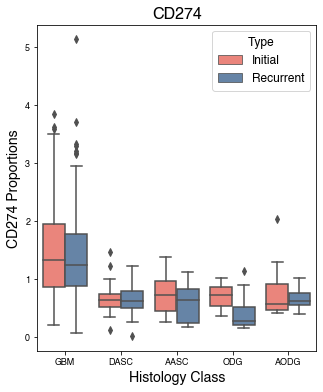

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
plt.title("CD274", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=CD274_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("CD274 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [19]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = CD274_mdf.loc[CD274_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.6137586286388925, pvalue=0.539374839564021)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.016386838133611553, pvalue=0.9869257799888039)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.3279056191361391, pvalue=0.18420928818665294)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=2.1166010488516727, pvalue=0.034293721036492766)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.31506301890630223, pvalue=0.7527138062630524)
--------------------------------


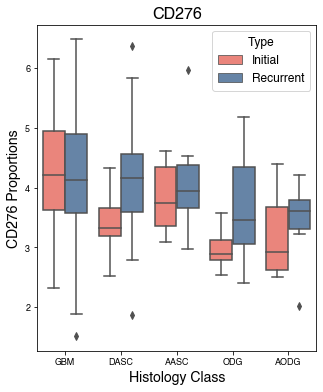

In [20]:
#CD276
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CD276"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CD276"]
recurrence.columns = ['Recurrent']
CD276_data = initial.join(recurrence)
CD276_final = pd.concat([pathology, CD276_data], axis=1)
CD276_final.index.name = 'Mixture'
CD276_final = CD276_final.drop(['Molecular pathology (per GLASS)'], axis=1)
CD276_final = CD276_final.sort_values(by='Mixture')
CD276_mdf = pd.melt(CD276_final.reset_index(), id_vars=('Mixture','Histology'))
plt.figure(figsize=(5,6))
plt.title("CD276", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=CD276_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("CD276 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [21]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = CD276_mdf.loc[CD276_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.229309253273811, pvalue=0.2189558792492543)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-3.310141302989534, pvalue=0.0009324888401079168)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.5196152422706631, pvalue=0.6033317722918665)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.511857892036909, pvalue=0.1305700181157362)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.8401680504168059, pvalue=0.40081416938293446)
--------------------------------


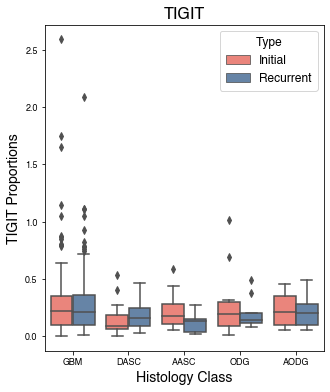

In [22]:
#TIGIT
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "TIGIT"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "TIGIT"]
recurrence.columns = ['Recurrent']
TIGIT_data = initial.join(recurrence)
TIGIT_final = pd.concat([pathology, TIGIT_data], axis=1)
TIGIT_final.index.name = 'Mixture'
TIGIT_final = TIGIT_final.drop(['Molecular pathology (per GLASS)'], axis=1)
TIGIT_final = TIGIT_final.sort_values(by='Mixture')
TIGIT_mdf = pd.melt(TIGIT_final.reset_index(), id_vars=('Mixture','Histology'))
plt.figure(figsize=(5,6))
plt.title("TIGIT", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=TIGIT_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("TIGIT Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [23]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = TIGIT_mdf.loc[TIGIT_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.292095347352232, pvalue=0.7702137239230148)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.8517127090981056, pvalue=0.06406708804431666)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.7897858344878397, pvalue=0.0734883472918226)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.30237157840738177, pvalue=0.7623688184698398)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.10502100630210073, pvalue=0.9163591402734885)
--------------------------------


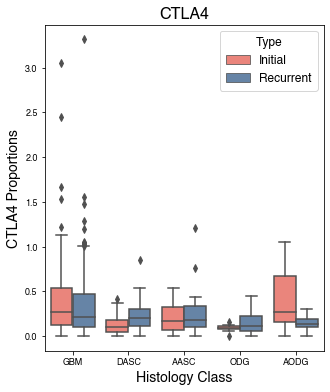

In [24]:
#CTLA4
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CTLA4"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CTLA4"]
recurrence.columns = ['Recurrent']
CTLA4_data = initial.join(recurrence)
CTLA4_final = pd.concat([pathology, CTLA4_data], axis=1)
CTLA4_final.index.name = 'Mixture'
CTLA4_final = CTLA4_final.drop(['Molecular pathology (per GLASS)'], axis=1)
CTLA4_final = CTLA4_final.sort_values(by='Mixture')
CTLA4_mdf = pd.melt(CTLA4_final.reset_index(), id_vars=('Mixture','Histology'))
plt.figure(figsize=(5,6))
plt.title("CTLA4", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=CTLA4_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("CTLA4 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [25]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = CTLA4_mdf.loc[CTLA4_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.0035177577745396, pvalue=0.31561111335767555)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.752988806446741, pvalue=0.005905391532593248)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.23094010767585027, pvalue=0.8173613313851769)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.680336051416609, pvalue=0.49629170223109287)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=1.6803361008336117, pvalue=0.09289194088370532)
--------------------------------


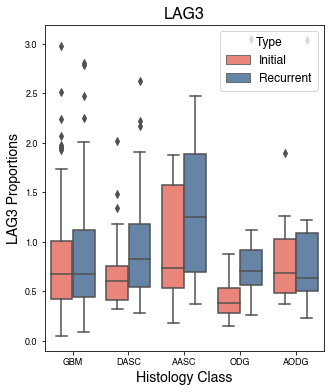

In [26]:
#LAG3
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "LAG3"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "LAG3"]
recurrence.columns = ['Recurrent']
LAG3_data = initial.join(recurrence)
LAG3_final = pd.concat([pathology, LAG3_data], axis=1)
LAG3_final.index.name = 'Mixture'
LAG3_final = LAG3_final.drop(['Molecular pathology (per GLASS)'], axis=1)
LAG3_final = LAG3_final.sort_values(by='Mixture')
LAG3_mdf = pd.melt(LAG3_final.reset_index(), id_vars=('Mixture','Histology'))
plt.figure(figsize=(5,6))
plt.title("LAG3", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Histology', y='value',hue="variable", data=LAG3_mdf)
ax.set_xlabel("Histology Class", fontsize=14)
ax.set_ylabel("LAG3 Proportions", fontsize=14)  
labels = ["GBM", "DASC", "AASC", "ODG", "AODG"]
ax.set_xticklabels(labels)
# legend = ["Initial", "Recurrent"]
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [27]:
histologies = ['Glioblastoma','Diffuse Astrocytoma','Anaplastic Astrocytoma','Oligodendroglioma','Anaplastic Oligodendroglioma']

for p in histologies:
    specific_progression = LAG3_mdf.loc[LAG3_mdf['Histology'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Glioblastoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.4238070530601404, pvalue=0.6717065339468482)
--------------------------------
Diffuse Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.064741604835056, pvalue=0.038947455742025384)
--------------------------------
Anaplastic Astrocytoma
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.2701705922171767, pvalue=0.2040238704744366)
--------------------------------
Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.1166010488516727, pvalue=0.034293721036492766)
--------------------------------
Anaplastic Oligodendroglioma
Between Initial and Recurrence: 
RanksumsResult(statistic=0.0, pvalue=1.0)
--------------------------------
